In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
train_data=pd.read_csv('./input/train.csv') 
test_data=pd.read_csv('./input/test.csv')

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

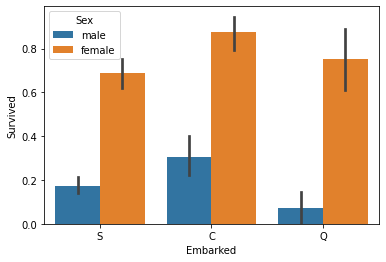

In [50]:
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=train_data)

In [51]:
print('Shape of train dataset:-',train_data.shape)
print('Shape of test dataset:-' ,test_data.shape)

#Info about datatype and statistical model

print('\n')
print(train_data.info())
train_data.describe()

Shape of train dataset:- (891, 12)
Shape of test dataset:- (418, 11)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
#Combining both train and test dataset
total=pd.concat([train_data.drop('Survived',axis=1),test_data])
target=train_data['Survived']

total.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
def missing_value_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(total/len(df)*100,2)
    print(pd.concat([total, percent], axis=1, keys=['Total','Percent']))

missing_value_percentage(total)

             Total  Percent
Cabin         1014    77.46
Age            263    20.09
Embarked         2     0.15
Fare             1     0.08
Ticket           0     0.00
Parch            0     0.00
SibSp            0     0.00
Sex              0     0.00
Name             0     0.00
Pclass           0     0.00
PassengerId      0     0.00


<AxesSubplot:>

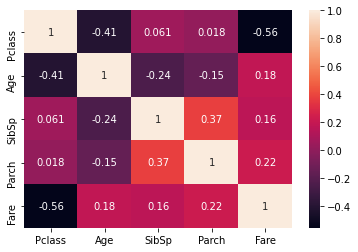

In [54]:
sns.heatmap(total.drop('PassengerId',axis=1).corr(),annot=True) 

In [55]:
def column_percent_value(df, feature):
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [56]:
column_percent_value(total, 'Embarked')

,Total,Percent
S,914,69.82
C,270,20.63
Q,123,9.40
NaN,2,0.15


In [29]:
features = [ 'Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
total = total[features]

In [57]:
total.Embarked.fillna("S", inplace=True)
total['Age'] = total.Age.fillna(total.Age.median())
total['Fare'] = total.Fare.fillna(total.Fare.median())

In [31]:
model = xgb.XGBClassifier(**{'colsample_bylevel': 0.7, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 1000,
                                 'reg_lambda': 15,'eval_metric': 'error','subsample': 0.5}).fit(train_df, target_data)

In [43]:
train_data = total[:len(train_data)]
test_data = total[len(test_data):]
test_data.shape

(418, 7)

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_tshape = train_test_split(train_data, target, test_size = 0.2,random_state =0)

In [36]:
from xgboost import XGBClassifier
classifier = XGBClassifier(colsample_bylevel= 0.9,
                    colsample_bytree = 0.8, 
                    gamma=0.99,
                    max_depth= 5,
                    min_child_weight= 1,
                    n_estimators= 10,
                    nthread= 4,
                    random_state= 2,
                    silent= True)
classifier.fit(X_train,y_train)
classifier.score(X_test,y_test)

[15:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:10:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8379888268156425

In [46]:
append_id = pd.read_csv('./input/test.csv')
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [47]:
##Now we predict the values
prediction = classifier.predict(test_data)
output = pd.DataFrame({'PassengerId': append_id.PassengerId,'Survived': prediction})
output.to_csv('submission_v8.csv', index=False)